# Генератор обучающей выборки (песок)

Равномерное заполнение изображения 256x256 px "песчинками" c разной интенсивностью

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
from numpy.random import randint, randn, poisson, choice, rand
from numpy import pi
from tqdm import tqdm_notebook, tnrange
%matplotlib inline

### Гиперпараметры

In [2]:
# размеры изображения обучающей выборки
W = 256
H = 256
# коэффициент антиалиасинга
AA = 3
# линейный тренд l = lambda = Kx + b
lStart = 0.2
lEnd = 5
K = (lEnd - lStart) / (W * AA)
# процент "обхождения x-ов"
B = 0.3
# радиус "песчинок"
r = 3
# названия и путь к файлам
fileName = "sample"
ext = ".jpg"
filePath = "../data/sand/trend2/"

### Функции генерирования сэмплов

In [3]:
def generateSample(w, h, l, B, num, AA, val=False, side=1):
    # новое ч/б изображение, размером в AA**2 раз больше для суперсэмплинга
    W = w * AA
    H = h * AA
    R = r * AA
    image = Image.new('1', (W, H), 'white')
    draw = ImageDraw.Draw(image)
    # карта заполнения, чтобы предотвратить взаимопроникновение "песчинок"
    pixelMap = image.load()
    # цикл по x-ам
    for k in range(int(B * W)):
        x = randint(1, W)
        # число событий пуассоновского потока на данной вертикали
        Nx = poisson(l(x))
        # находим недоступные на данный момент y
        bannedY = set()
        for y in range(H):
            banCond = 0
            for j in range(R + 1):
                # условия недоступности y
                if (x - j > 0):
                    cLeft = pixelMap[x - j, y]
                else:
                    cLeft = True
                if (x + j < W - 1):
                    cRight = pixelMap[x + j, y]
                else:
                    cRight = True
                if (y - j > 0):
                    cTop = pixelMap[x, y - j]
                else:
                    cTop = True
                if (y + j < H - 1):
                    cBot = pixelMap[x, y + j]
                else:
                    cBot = True
                freeCond = banCond or cLeft or cRight or cTop or cBot
            if(not(freeCond)):
                bannedY.add(y)
        # заполняем вертикаль
        freeY = set(range(W)) - bannedY
        for j in range(Nx):
            # генерируем y из доступных значений
            y = choice(list(freeY))
            draw.ellipse((x - R, y - R, x + R, y + R), fill='black')
            freeY -= set(range(y - R, y + R + 1))
    # суперсэмплинг с антиалиасингом
    image = image.resize((w, h))
    fullFilePath = filePath
    if (val == False):
        fullFilePath += "train/"
    else:
        fullFilePath += "validation/"
    if (side == 1):
        fullFilePath += "side1/"
    elif (side == 2):
        fullFilePath += "side2/"
    else:
        fullFilePath += "panorama/"
    fullFilePath += (fileName + str(num) + ext)
    image.save(fullFilePath)

In [4]:
# количество сэмплов для генерации
N = 10
# train/validation = 80/20
N_train = int(0.8 * N)
N_val = N - N_train
for i in tnrange(N_train, desc='Train'):
    generateSample(W, H, lambda x: lStart, B, i, AA, val=False, side=1)
    generateSample(W, H, lambda x: lEnd, B, i, AA, val=False, side=2)
    generateSample(W, H, lambda x: lStart + K * x, B, i, AA, val=False, side=3)

for i in tnrange(N_val, desc='Validation'):
    generateSample(W, H, lambda x: lStart, B, i, AA, val=True, side=1)
    generateSample(W, H, lambda x: lEnd, B, i, AA, val=True, side=2)
    generateSample(W, H, lambda x: lStart + K * x, B, i, AA, val=True, side=3)

In [ ]:
w = W * AA
h = H * AA
R = r * AA
image = Image.new('1', (w, h), 'white')
draw = ImageDraw.Draw(image)
x = 0


In [11]:
from numpy.random import rand
from math import log
t = 0
for k in range(1000):
    u1 = rand()
    t -= (1/4) * log(u1)

In [14]:
l = lambda x: lStart + K * x

In [104]:
num = 0
x = 0
X = np.zeros(768)
X_fl = []
while int(x) < 767:
    u1 = rand()
    x -= log(u1) / lStart
    u2 = rand()
    if (u2 <= lStart / lStart):
        num +=1
        try:
            X[int(x)] += 1
        except IndexError:
            print('dada')
            break

dada


In [110]:
X.astype('int')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0,

In [94]:
X *= K
X = X.astype('int')

In [95]:
sum(X)

1189

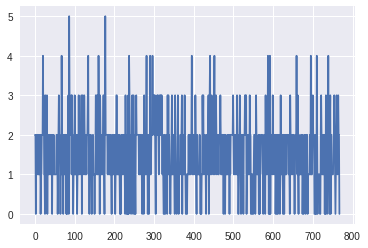

In [96]:
plt.plot(X)

In [81]:
sum(X)

449

In [100]:
len(set([1, 2]) - set([1, 2]))

0